<a href="https://colab.research.google.com/github/rsonar821/Regression-Capstone-Project/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date: Date on which bike was rented (Format: year-month-day)
* ### Rented Bike Count: Count of bikes rented at each hour
* ### Hour: Hour of the day
* ### Temperature: Temperature of the hour in Celsius
* ### Humidity: Humidity% of the hour
* ### Windspeed: Windspeed of the hour in m/s
* ### Visibility: Visibility of the hour in units of 10m
* ### Dew Point Temperature: Dew Point Temperature of the hour in Celsius
* ### Solar Radiation: Solar Radiation of the hour in MJ/m2
* ### Rainfall: Rainfall of the hour in mm
* ### Snowfall: Snowfall of the hour in cm
* ### Seasons: 4 seasons (Winter, Spring, Summer and Autumn)
* ### Holiday: Whether the day is a Holiday or a Working Day
* ### Functional Day: Whether the day is functional for renting bikes or not.

In [52]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Importing Libraries for Data Processing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV

# Importing Model Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [53]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Loading the dataset

df = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding= 'unicode_escape')

## **Analyzing and understanding the dataset**

In [55]:
# Printing the first 5 rows

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [56]:
# Printing the last 5 rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [57]:
# Checking the shape of the dataset

print('Shape of the dataset:',end='')
df.shape

Shape of the dataset:

(8760, 14)

In [58]:
# Checking the names of all the columns of the dataset

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [59]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [60]:
# Checking null values in the dataset

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No null values in the dataset

In [61]:
# Statistical description of the dataset

df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [62]:
# Checking the unique values of the 'Seasons' column

df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [63]:
# Checking the unique values of the 'Holiday' column

df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [64]:
# Checking the unique values of the 'Functioning Day' column

df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [65]:
# Checking the shape of the dataset where rented bike count is equal to 0

df[df['Rented Bike Count']==0].shape

(295, 14)

In [66]:
# Checking the shape of the dataset where the renting bike store was not functional

df[df['Functioning Day']=='No'].shape

(295, 14)

The days on which 0 bikes have been rented were the days where the bike rental store was not functional and it is quite obvious that no bikes would be rented if the store is closed for that day

In [67]:
# Updating the dataframe where the bike rental count is not 0

df = df[df['Rented Bike Count']!=0]

In [68]:
# Checking the shape of the updated dataframe

print('Shape of the dataset:', end='')
df.shape

Shape of the dataset:

(8465, 14)

In [69]:
# Checking the basic information of the updated dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8465 non-null   object 
 1   Rented Bike Count          8465 non-null   int64  
 2   Hour                       8465 non-null   int64  
 3   Temperature(°C)            8465 non-null   float64
 4   Humidity(%)                8465 non-null   int64  
 5   Wind speed (m/s)           8465 non-null   float64
 6   Visibility (10m)           8465 non-null   int64  
 7   Dew point temperature(°C)  8465 non-null   float64
 8   Solar Radiation (MJ/m2)    8465 non-null   float64
 9   Rainfall(mm)               8465 non-null   float64
 10  Snowfall (cm)              8465 non-null   float64
 11  Seasons                    8465 non-null   object 
 12  Holiday                    8465 non-null   object 
 13  Functioning Day            8465 non-null   objec

In [70]:
# Checking the statistical description of the updated dataframe

df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8465,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465,8465,8465
unique,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,1
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8057,8465
mean,NaN,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,NaN,NaN,NaN
std,NaN,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,NaN,NaN,NaN
min,NaN,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,NaN,NaN,NaN
25%,NaN,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,NaN,NaN,NaN
50%,NaN,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,NaN,NaN,NaN
75%,NaN,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,NaN,NaN,NaN


## Classifying the categorical and numerical data:

*   **Categorical:**

 1. Hour
 2. Seasons
 3. Holiday
 4. Functioning Day


*   **Numerical:**

 1. Rented Bike Count
 2. Temperature
 3. Humidity
 4. Windspeed
 5. Visibility
 6. Dew Point Temperature
 7. Solar Radiation
 8. Rainfall
 9. Snowfall

**Dependent Variable:**

Rented Bike Count

In [71]:
# Converting the 'Date' column to a date-time datatype

df['Date'] = pd.to_datetime(df['Date'])

In [72]:
# Extracting the year, months and days from the 'Date' column

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day'] =df['Date'].dt.day_name()

## **Data Visualization**

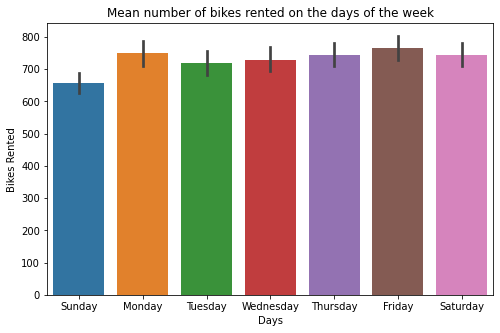

In [73]:
# Plotting a barplot of the average number of bikes rented on the days of the week

plt.figure(figsize=(8,5))
figure = sns.barplot(x=df['Day'], y=df['Rented Bike Count'], order=['Sunday', 'Monday',
                                                           'Tuesday', 'Wednesday',
                                                           'Thursday', 'Friday',
                                                           'Saturday'])
figure.set(title='Mean number of bikes rented on the days of the week')
figure.set(xlabel='Days', ylabel='Bikes Rented')
plt.show(figure)

Least numbers of bikes are being rented on Sundays, it shows people tend to rent the bikes for work and office purposes

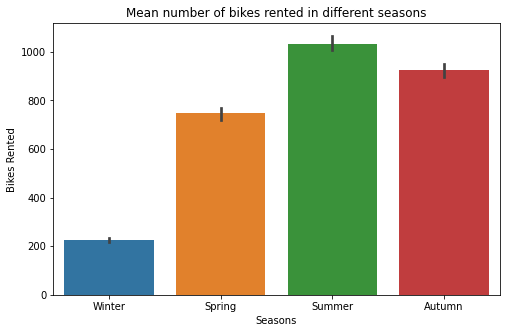

In [74]:
# Plotting a barplot of the average number of bikes rented in different seasons

plt.figure(figsize=(8,5))
figure = sns.barplot(x=df['Seasons'], y=df['Rented Bike Count'])
figure.set(title='Mean number of bikes rented in different seasons')
figure.set(xlabel='Seasons', ylabel='Bikes Rented')
plt.show(figure)

Maximum bikes are being rented in the Summer Season and least number of bikes are being rented in the Winter Season

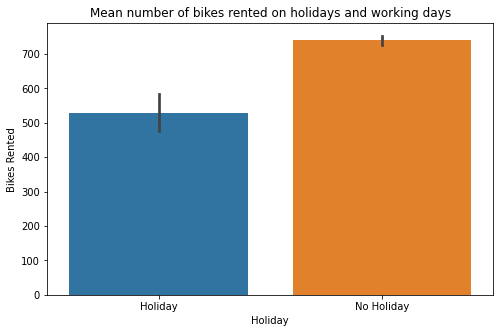

In [75]:
# Plotting a barplot of the average number of bikes rented on holidays and working days

plt.figure(figsize=(8,5))
figure = sns.barplot(x=df['Holiday'], y=df['Rented Bike Count'], order=['Holiday',
                                                                        'No Holiday'])
figure.set(title='Mean number of bikes rented on holidays and working days')
figure.set(xlabel='Holiday', ylabel='Bikes Rented')
plt.show(figure)

More number of bikes are being rented on the working days indicating that people rent bikes for work purposes more than leisure purposes

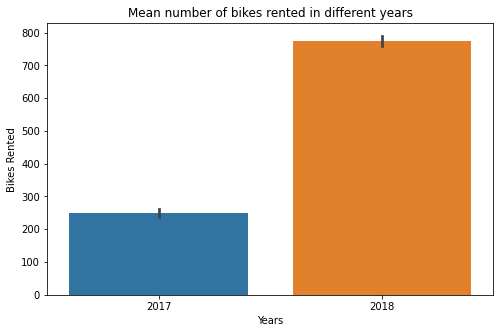

In [76]:
# Plotting a barplot of the average number of bikes rented in 2017 and 2018

plt.figure(figsize=(8,5))
figure = sns.barplot(x=df['Year'], y=df['Rented Bike Count'])
figure.set(title='Mean number of bikes rented in different years')
figure.set(xlabel='Years', ylabel='Bikes Rented')
plt.show(figure)

The graph shows that the bike renting business is a growing business as the number of bikes rented in 2018 is more than the bikes rented in 2017

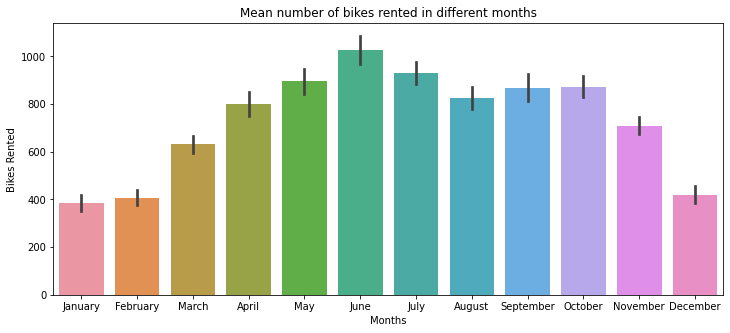

In [77]:
# Plotting a barplot of the average number of bikes rented in different months of the year

plt.figure(figsize=(12,5))
figure = sns.barplot(x=df['Month'], y=df['Rented Bike Count'])
figure.set(title='Mean number of bikes rented in different months')
figure.set(xlabel='Months', ylabel='Bikes Rented')
plt.show(figure)

Maximum number of bikes are getting rented in the month of May, June and July which are the summer months and it can be seen that people love riding the bikes in the summer season

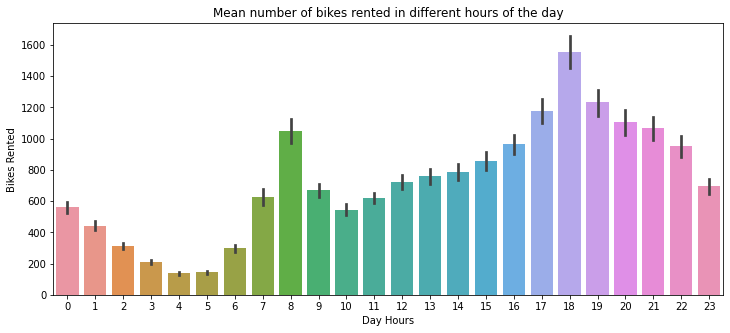

In [78]:
# Plotting a barplot of the average number of bikes rented at different hour of the day

plt.figure(figsize=(12,5))
figure = sns.barplot(x=df['Hour'], y=df['Rented Bike Count'])
figure.set(title='Mean number of bikes rented in different hours of the day')
figure.set(xlabel='Day Hours', ylabel='Bikes Rented')
plt.show(figure)

Maximum number of bikes being rented in the evening time are at 5pm, 6pm and 7pm showing that people mostly rent bikes in the evening for leisure purposes after the office time.

Maximum number of bikes being rented in the morning time are at 8am showing that people rent bikes for going to office.

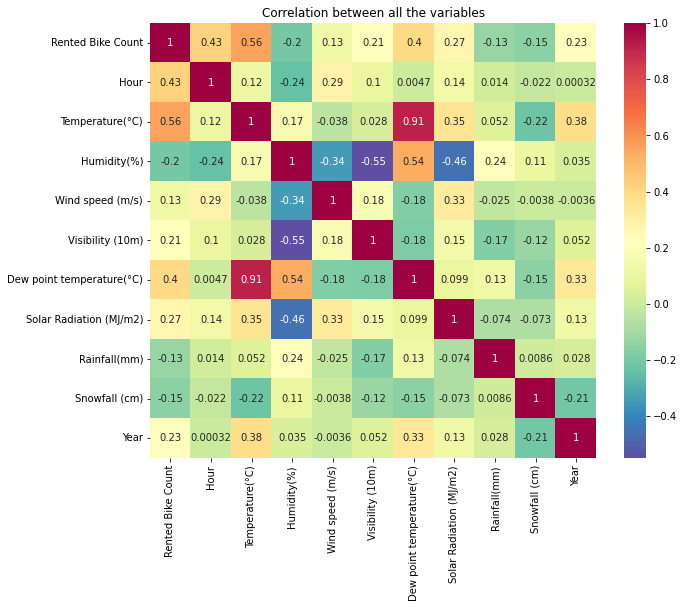

In [79]:
# Plotting a heatmap between all the variables to see the relation between each one of them

plt.figure(figsize=(10,8))
figure = sns.heatmap(df.corr(), annot=True, cmap='Spectral_r')
figure.set(title='Correlation between all the variables')
plt.show(figure)

Maximum collinearity between dependent and independent variable:
1. Temperature and Rented Bike Count
2. Hour and Rented Bike Count

Maximum collinearity between 2 independent variables (Multi-Collinearity):
1. Temperature and Dew Point Temperature
2. Visibility and Humidity
3. Dew Point Temperature and Humidity
4. Solar Radiation and Humidity

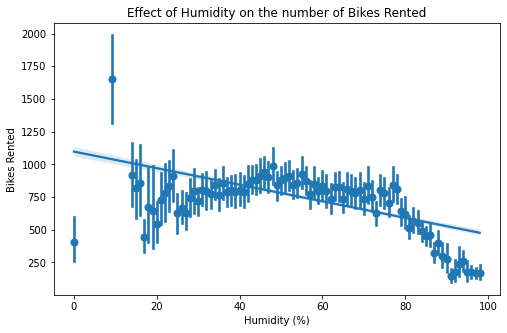

In [80]:
# Plotting a regression plot between the number of bikes rented and Humidity

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['Humidity(%)'], y=df['Rented Bike Count'], x_bins=1000, fit_reg=True)
figure.set(title='Effect of Humidity on the number of Bikes Rented')
figure.set(xlabel='Humidity (%)', ylabel='Bikes Rented')
plt.show(figure)

Number of bikes rented and Humidity shows a negative correlation

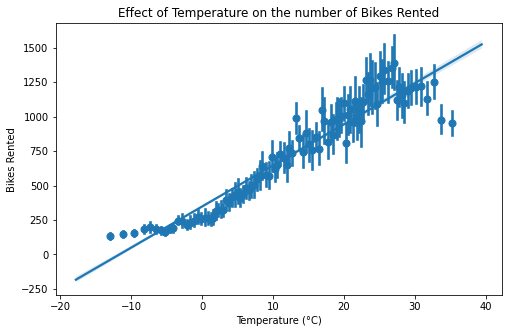

In [81]:
# Plotting a regression plot between the number of bikes rented and Temperature

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['Temperature(°C)'], y=df['Rented Bike Count'], x_bins=100, fit_reg=True)
figure.set(title='Effect of Temperature on the number of Bikes Rented')
figure.set(xlabel='Temperature (°C)', ylabel='Bikes Rented')
plt.show(figure)

Number of bikes rented and Temperature shows a positive correlation

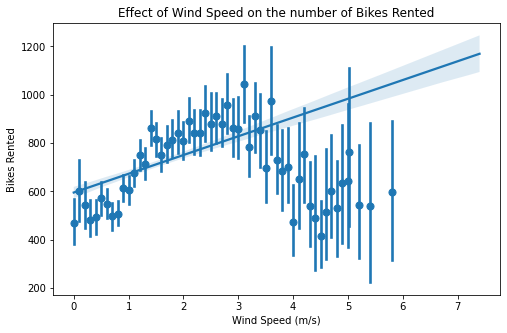

In [82]:
# Plotting a regression plot between the number of bikes rented and Wind Speed

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['Wind speed (m/s)'], y=df['Rented Bike Count'], x_bins=1000, fit_reg=True)
figure.set(title='Effect of Wind Speed on the number of Bikes Rented')
figure.set(xlabel='Wind Speed (m/s)', ylabel='Bikes Rented')
plt.show(figure)

Number of bikes rented and Windspeed does not show a good correlation

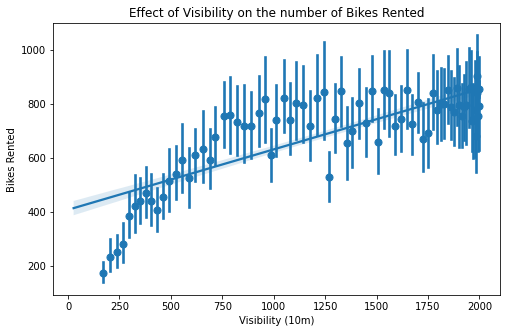

In [83]:
# Plotting a regression plot between the number of bikes rented and Visibility

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['Visibility (10m)'], y=df['Rented Bike Count'], x_bins=100, fit_reg=True)
figure.set(title='Effect of Visibility on the number of Bikes Rented')
figure.set(xlabel='Visibility (10m)', ylabel='Bikes Rented')
plt.show(figure)

Number of bikes rented and Visibilty shows a positive correlation

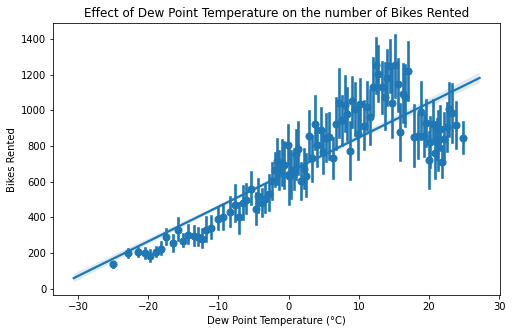

In [84]:
# Plotting a regression plot between the number of bikes rented and Dew Point Temperature

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['Dew point temperature(°C)'], y=df['Rented Bike Count'], x_bins=100, fit_reg=True)
figure.set(title='Effect of Dew Point Temperature on the number of Bikes Rented')
figure.set(xlabel='Dew Point Temperature (°C)', ylabel='Bikes Rented')
plt.show(figure)

Number of bikes rented and Dew Point Temperature shows a positive correlation

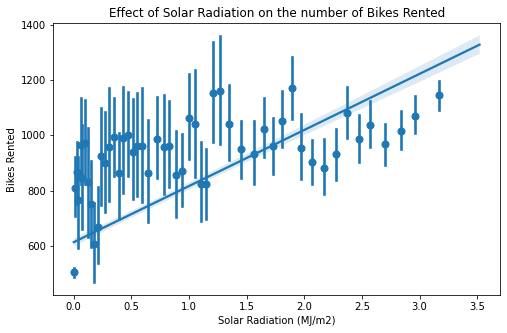

In [85]:
# Plotting a regression plot between the number of bikes rented and Solar Radiation

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['Solar Radiation (MJ/m2)'], y=df['Rented Bike Count'], x_bins=100, fit_reg=True)
figure.set(title='Effect of Solar Radiation on the number of Bikes Rented')
figure.set(xlabel='Solar Radiation (MJ/m2)', ylabel='Bikes Rented')
plt.show(figure)

Number of bikes rented and Solar Radiation shows a positive correlation

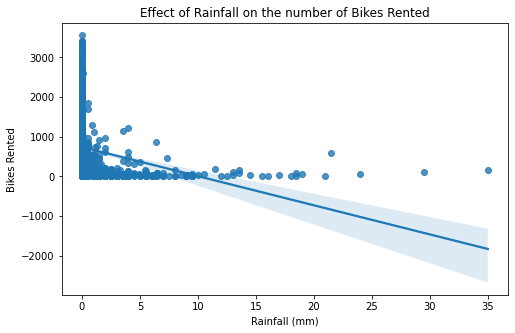

In [86]:
# Plotting a regression plot between the number of bikes rented and Rainfall

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['Rainfall(mm)'], y=df['Rented Bike Count'], fit_reg=True)
figure.set(title='Effect of Rainfall on the number of Bikes Rented')
figure.set(xlabel='Rainfall (mm)', ylabel='Bikes Rented')
plt.show(figure)

Number of bikes rented and Rainfall does not show a good correlation

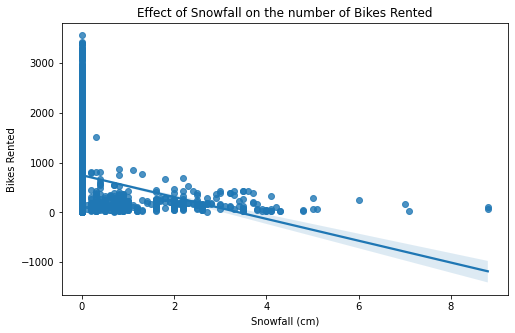

In [87]:
# Plotting a regression plot between the number of bikes rented and Snowfall

plt.figure(figsize=(8,5))
figure = sns.regplot(x=df['Snowfall (cm)'], y=df['Rented Bike Count'], fit_reg=True)
figure.set(title='Effect of Snowfall on the number of Bikes Rented')
figure.set(xlabel='Snowfall (cm)', ylabel='Bikes Rented')
plt.show(figure)

Number of bikes rented and Snowfall does not show a good correlation

In [88]:
# Converting Snowfall and Rainfall to categorical variables

df['Snowfall (cm)'] = np.where(df['Snowfall (cm)']>df['Snowfall (cm)'].mean(), 1, 0)
df['Rainfall(mm)'] = np.where(df['Rainfall(mm)']>df['Rainfall(mm)'].mean(), 1, 0)

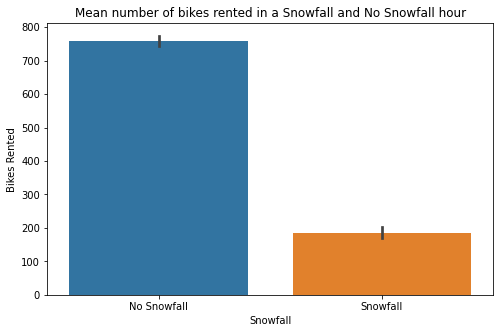

In [89]:
# Plotting a barplot of the average number of bikes rented in Snowfall or No Snowfall hour

plt.figure(figsize=(8,5))
figure = sns.barplot(x=df['Snowfall (cm)'], y=df['Rented Bike Count'])
figure.set(title='Mean number of bikes rented in a Snowfall and No Snowfall hour')
figure.set(xlabel='Snowfall', ylabel='Bikes Rented')
figure.set_xticklabels(['No Snowfall', 'Snowfall'])
plt.show(figure)

Maximum number of bikes are rented in No Snowfall hour

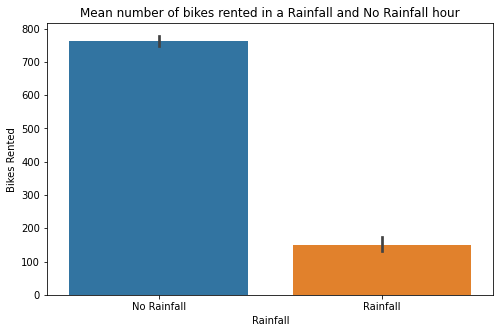

In [90]:
# Plotting a barplot of the average number of bikes rented in Rainfall or No Rainfall hour

plt.figure(figsize=(8,5))
figure = sns.barplot(x=df['Rainfall(mm)'], y=df['Rented Bike Count'])
figure.set(title='Mean number of bikes rented in a Rainfall and No Rainfall hour')
figure.set(xlabel='Rainfall', ylabel='Bikes Rented')
figure.set_xticklabels(['No Rainfall', 'Rainfall'])
plt.show(figure)

Maximum number of bikes are rented in No Rainfall hour

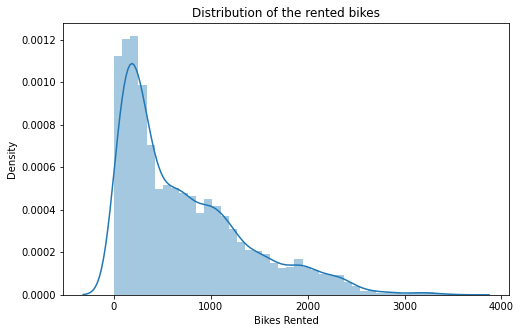

In [91]:
# Plotting a distribution plot of the dependent variable(Rented Bike Count)

plt.figure(figsize=(8,5))
figure = sns.distplot(df['Rented Bike Count'])
figure.set(title='Distribution of the rented bikes')
figure.set(xlabel='Bikes Rented')
plt.show(figure)

In [92]:
# Checking the skewness of the dependent variable

df['Rented Bike Count'].agg(['skew'])

skew    1.1397
Name: Rented Bike Count, dtype: float64

**Graph and Skewness**

**Fairly Symmetrical:** -0.5 to 0.5

**Moderate Skewed:** -0.5 to -1.0 and 0.5 to 1.0

**Highly Skewed:** < -1.0 and > 1.0

In [93]:
# Square Root Transformation of the dependent variable

df['Rented Bike Count'] = np.sqrt(df['Rented Bike Count'])

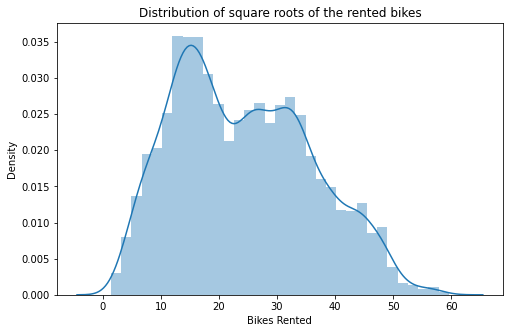

In [94]:
# Plotting a distribution plot of the square root transformed dependent variable(Rented Bike Count)

plt.figure(figsize=(8,5))
figure = sns.distplot(df['Rented Bike Count'])
figure.set(title='Distribution of square roots of the rented bikes')
figure.set(xlabel='Bikes Rented')
plt.show(figure)

In [95]:
# Checking the skewness of the square root transformed dependent variable

df['Rented Bike Count'].agg(['skew'])

skew    0.346703
Name: Rented Bike Count, dtype: float64

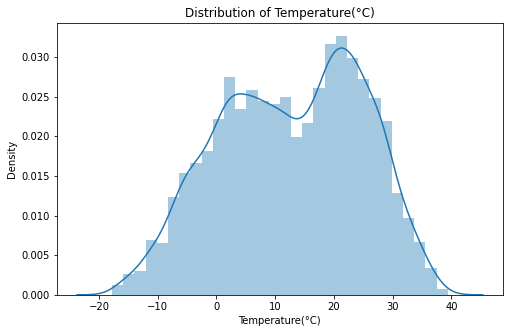

------------------------------------------------------------------------------------------------------------------------------------------------------


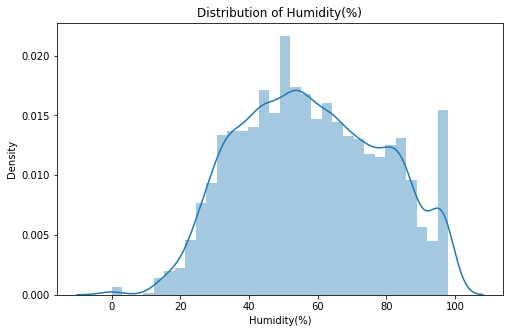

------------------------------------------------------------------------------------------------------------------------------------------------------


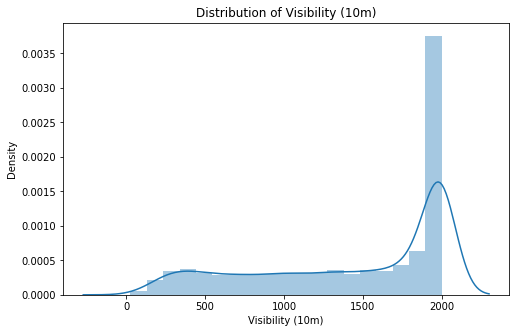

------------------------------------------------------------------------------------------------------------------------------------------------------


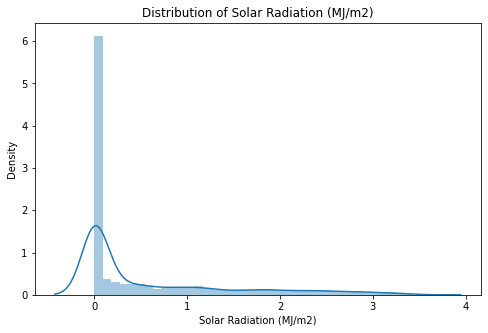

------------------------------------------------------------------------------------------------------------------------------------------------------


In [96]:
# Plotting distribution plots of the rest independent variables

independent_variables = ['Temperature(°C)', 'Humidity(%)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)']
for i in independent_variables:
  plt.figure(figsize=(8,5))
  figure = sns.distplot(df[i])
  figure.set(title=f'Distribution of {i}')
  figure.set(xlabel=i)
  plt.show(figure)
  print(('---')*50)

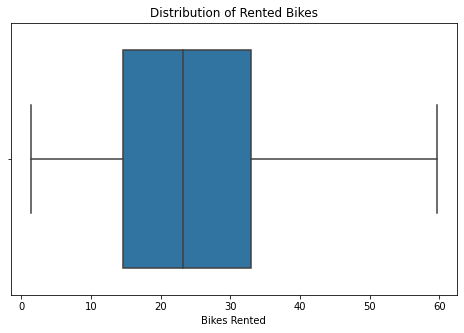

In [97]:
# Plotting boxplot of the dependent variable

plt.figure(figsize=(8,5))
figure = sns.boxplot(df['Rented Bike Count'])
figure.set(title='Distribution of Rented Bikes')
figure.set(xlabel='Bikes Rented')
plt.show(figure)

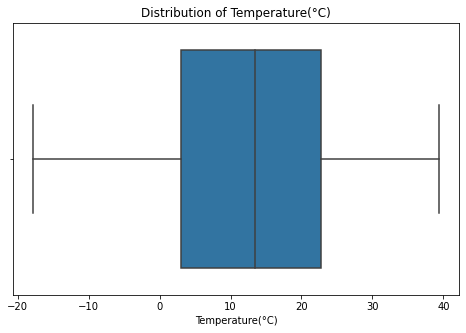

------------------------------------------------------------------------------------------------------------------------------------------------------


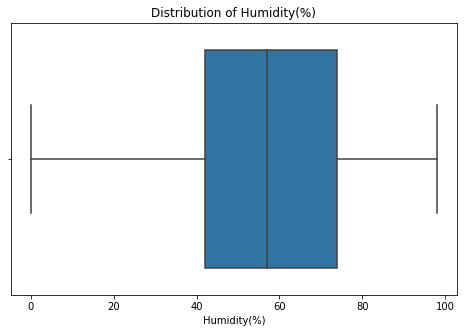

------------------------------------------------------------------------------------------------------------------------------------------------------


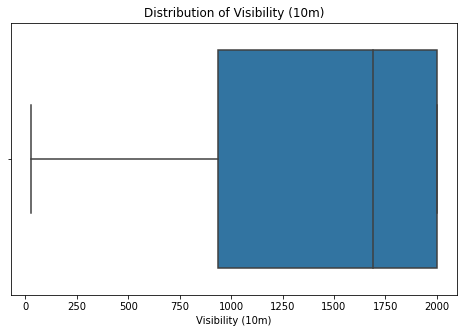

------------------------------------------------------------------------------------------------------------------------------------------------------


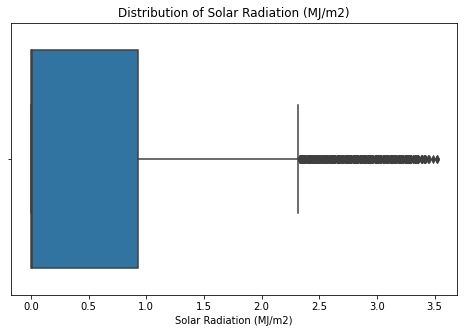

------------------------------------------------------------------------------------------------------------------------------------------------------


In [98]:
# Plotting boxplots of the rest independent variables

for i in independent_variables:
  plt.figure(figsize=(8,5))
  figure = sns.boxplot(df[i])
  figure.set(title=f'Distribution of {i}')
  figure.set(xlabel=i)
  plt.show(figure)
  print(('---')*50)

## **Data Modelling**

In [99]:
# Converting the 'Month' and 'Day' columns to numerical values for modelling

df['Month'] = df['Date'].dt.month
df['Day'] =df['Date'].dt.weekday

In [100]:
# Creating numerical values from categorical columns 'Seasons', 'Holiday', and 'Year' for modelling

df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Year'], drop_first=True)

In [101]:
# Dropping the columns which are not required for the modelling

drop_cols = ['Date', 'Rainfall(mm)', 'Snowfall (cm)', 'Dew point temperature(°C)', 'Wind speed (m/s)', 'Functioning Day']
df.drop(drop_cols, axis=1, inplace=True)

In [102]:
# Splitting the data into X and Y as independent and dependent variables respectively 

X = df.drop('Rented Bike Count', axis=1)
Y = df['Rented Bike Count']

In [103]:
# Splitting the dataset into 20:80 ratio as test and train data respectively

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [104]:
# Scaling the dataset for making all the values come in a common range

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [105]:
# Transforming the data in gaussian form for better results

power = PowerTransformer(method='yeo-johnson')
X_train = power.fit_transform(X_train)